In [35]:
from verispy import VERIS
# data_dir = "F:\\unay\\4th\\cs\\sec\\VCDB\\data\\json\\validated"
data_dir = "C:\\Users\\Fraser\\VCDB\\data\\json\\validated"

In [108]:
v = VERIS(json_dir=data_dir)
schema_path = "C:\\Users\\Fraser\\VCDB\\verisc-merged.json"

Found 8622 json files.


In [109]:
df = v.json_to_df(verbose=True, schema_path=schema_path)

  8%|██████▍                                                                      | 717/8622 [00:00<00:01, 5941.47it/s]

Loading schema
Loading JSON files to DataFrame.


  6%|████▋                                                                            | 10/173 [00:00<00:02, 72.66it/s]

Finished loading JSON files to dataframe.
Building DataFrame with enumerations.
Building enumeration columns.


100%|████████████████████████████████████████████████████████████████████████████████| 173/173 [00:07<00:00, 24.54it/s]


Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame


## How do internal and external attacks compare?

#### Basic Internal and External Statistics

In [136]:
#internal = v.enum_summary(df, 'actor.internal.variety', by='actor')
#external = v.enum_summary(df, 'actor.external.variety', by='actor')
actors = v.enum_summary(df, 'actor')
actors = actors[['enum', 'x']]
actors.columns = ['Actor Type', 'Count']
actors = actors.drop(2)
actors = actors.drop(3)


(3000.0, 4500.0)

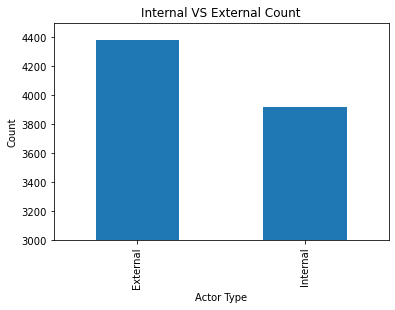

In [137]:
import matplotlib.pyplot as plt
from matplotlib import cm


ax = actors['Count'].plot(kind="bar")
plt.xlabel("Actor Type")
plt.ylabel("Count")
plt.title("Internal VS External Count")
ax.set_xticklabels(["External", "Internal"])
plt.ylim(3000, 4500)

In [96]:


internal = v.enum_summary(df, 'actor.internal.motive')
internal = internal.drop(internal.index[0])
internal = internal.drop(10)
internal = internal[['enum', 'x']]
internal.columns = ['internal Actor Motive', 'Count']

def avg(x):
    total = internal['Count'].sum()
    return round((x / total) * 100, 1)

internal['Percentage'] = internal['Count'].apply(lambda x: avg(x))
internal = internal.sort_values(by='Percentage', ascending=False)

internal.head(20)

,internal Actor Motive,Count,Percentage
1,Financial,758,56.7
2,Fun,267,20.0
3,Convenience,90,6.7
4,Espionage,83,6.2
5,Grudge,73,5.5
6,Other,44,3.3
7,Ideology,18,1.3
8,Fear,4,0.3
9,Secondary,0,0.0


In [97]:
external = v.enum_summary(df, 'actor.external.motive')
external = external.drop(10)
external = external.drop(5)
external = external[['enum', 'x']]
external.columns = ['External Actor Motive', 'Count']

def avg(x):
    total = external['Count'].sum()
    return round((x / total) * 100, 1)

external['Percentage'] = external['Count'].apply(lambda x: avg(x))
external = external.sort_values(by='Percentage', ascending=False)
external.head(20)

,External Actor Motive,Count,Percentage
0,Financial,2045,65.9
1,Ideology,387,12.5
2,Espionage,283,9.1
3,Fun,240,7.7
4,Grudge,109,3.5
6,Other,22,0.7
7,Secondary,13,0.4
8,Fear,4,0.1
9,Convenience,1,0.0


In [98]:
actors = v.enum_summary(df, 'actor')
actors.head()

,enum,x,n,freq
0,External,4379,8410.0,0.52069
1,Internal,3921,8410.0,0.46623
2,Partner,371,8410.0,0.04411
3,Unknown,212,NaN,NaN


In [99]:
# cols = df.columns.values.tolist()
# print(cols)

In [100]:
internal = df[df['actor.Internal']]
internal.head()
internal.shape

(3921, 2347)

In [101]:
external = df[df['actor.External']]
external.head()
external.shape

(4379, 2347)

In [102]:

#print(df['impact.loss.rating.Major'].dtype)

In [47]:
external_size = v.enum_summary(external, 'victim.employee_count')
external_size.head(100)

,enum,x,n,freq
0,1001 to 10000,589,2825.0,0.20850
1,101 to 1000,547,2825.0,0.19363
2,11 to 100,496,2825.0,0.17558
3,1 to 10,297,2825.0,0.10513
4,10001 to 25000,243,2825.0,0.08602
5,Small,235,2825.0,0.08319
6,Over 100000,130,2825.0,0.04602
7,Large,119,2825.0,0.04212
8,25001 to 50000,94,2825.0,0.03327
9,50001 to 100000,75,2825.0,0.02655


In [48]:
internal_size = v.enum_summary(internal, 'victim.employee_count')
internal_size.head(100)

,enum,x,n,freq
0,Over 100000,891,2788.0,0.31958
1,1001 to 10000,538,2788.0,0.19297
2,101 to 1000,382,2788.0,0.13702
3,11 to 100,211,2788.0,0.07568
4,Small,189,2788.0,0.06779
5,10001 to 25000,181,2788.0,0.06492
6,Large,138,2788.0,0.04950
7,1 to 10,114,2788.0,0.04089
8,25001 to 50000,89,2788.0,0.03192
9,50001 to 100000,55,2788.0,0.01973


In [49]:
df2 = v.enum_summary(df, 'victim.employee_count')
company_size = df2[['enum']]
company_size.columns = ['Employee Count']
company_size.insert(1, 'Internal', internal_size['x'], allow_duplicates=False)
company_size.insert(1, 'External', external_size['x'], allow_duplicates=False)
company_size.head()
company_size = company_size.drop(10)

Text(0.5, 1.0, 'Internal vs External Attacks based on Target Company Size')

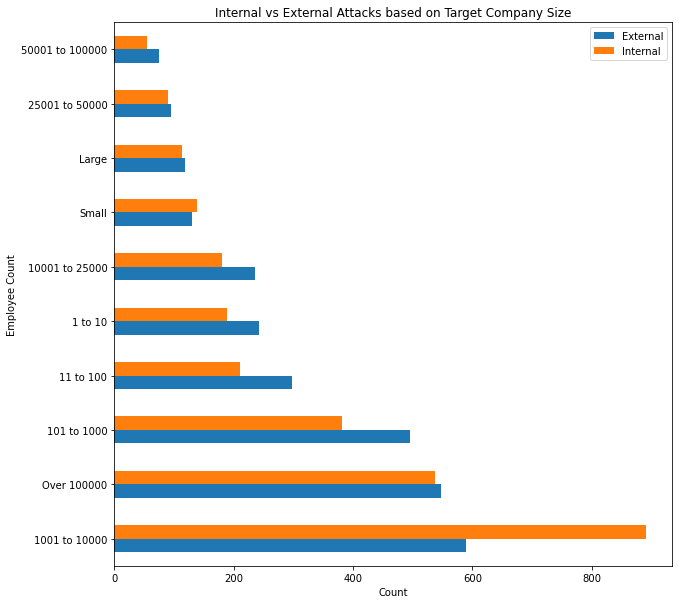

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

company_size['Employee Count'] = pd.Categorical(company_size['Employee Count'], ["Small", "Large", "1 to 10", "11 to 100", "101 to 1000", "1001 to 10000", "10001 to 25000", "25001 to 50000", "50001 to 100000", "Over 100000"])
#company_size.sort_values('Employee Count')
company_size.plot(kind="barh", x="Employee Count", figsize=(10,10))
#company_size.head()
plt.xlabel("Count")
plt.title("Internal vs External Attacks based on Target Company Size")

## Most Damaging Attacks in External and Internal

In [51]:
#external = df[df['actor.External']]
#impacts = v.enum_summary(df, 'impact.loss.rating')
attacks = v.enum_summary(df, 'action')
external = v.enum_summary(attacks, 'actor.External')
internal = v.enum_summary(attacks, 'actor.Internal')
internal_attacks = v.enum_summary(internal, 'action')
external_attacks = v.enum_summary(external, 'action')
#attacks = attacks[['enum']]
#attacks.insert(1, 'Internal', internal['x'], allow_duplicates=False)
attacks.head()

,enum,x,n,freq
0,Error,2522,8400.0,0.30024
1,Hacking,2284,8400.0,0.27190
2,Misuse,1738,8400.0,0.20690
3,Physical,1606,8400.0,0.19119
4,Malware,750,8400.0,0.08929


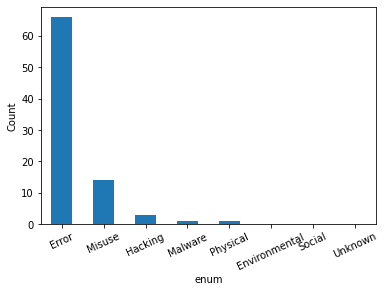

In [52]:
df_actors_developers = v.enum_summary(df, 'action', by='actor.internal.variety')
df_actors_developers = df_actors_developers[df_actors_developers['by'] == 'actor.internal.variety.Developer']
df_actors_developers.plot(kind='bar', x='enum', y='x', legend=False)
plt.xticks(rotation=25)
plt.ylabel('Count')
plt.savefig('df_actors_developers')

In [126]:
import numpy as np
df_action_actor = v.enum_summary(df, 'action', by='actor')
df_action_actor.drop(['n', 'freq'], axis=1, inplace=True)
df_action_actor.columns = ['Actor Origin', 'Action Type', 'Count']
df_Unknown_3 = df_action_actor[df_action_actor['Actor Origin'] == 'actor.Unknown']
df_action_actor.drop(df_Unknown_3.index, inplace=True)
df_action_actor.head(30)

,Actor Origin,Action Type,Count
0,actor.External,Hacking,2223
1,actor.External,Physical,1419
2,actor.External,Malware,739
3,actor.External,Social,567
4,actor.External,Misuse,170
5,actor.External,Error,129
6,actor.External,Environmental,6
7,actor.External,Unknown,65
8,actor.Internal,Error,2219
9,actor.Internal,Misuse,1610


In [175]:
action_xtab = pd.pivot_table(df_action_actor, values='Count', index=['Actor Origin'],
                    columns=['Action Type'], aggfunc=np.sum)

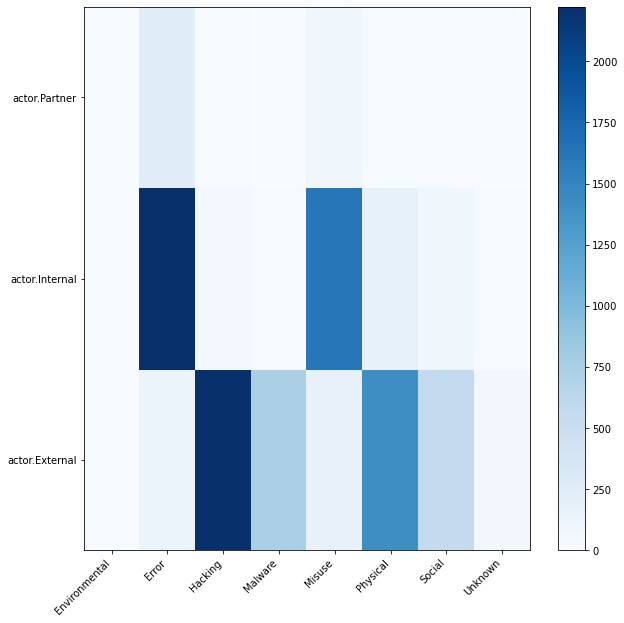

In [178]:
action_fig = plt.pcolor(action_xtab, cmap=cm.Blues)
plt.yticks(np.arange(0.5,len(action_xtab.index), 1), action_xtab.index)
plt.xticks(np.arange(0.5,len(action_xtab.columns), 1), action_xtab.columns, rotation=45, ha="right")
plt.colorbar()
plt.rcParams["figure.figsize"] = (10,10)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# cb.ax.yaxis.set_tick_params(colors='white')

In [55]:
df3 = df[df['actor.Internal'] == True]
df3 = df3[df3['action.Hacking'] == True]

summary = v.enum_summary(df3, 'impact.overall_rating')
summary.head(20)

,enum,x,n,freq
0,Insignificant,4,6.0,0.66667
1,Distracting,1,6.0,0.16667
2,Painful,1,6.0,0.16667
3,Catastrophic,0,6.0,0.00000
4,Damaging,0,6.0,0.00000
5,Unknown,41,NaN,NaN


In [56]:
df3 = df[df['actor.External'] == True]
df3 = df3[df['action.Hacking'] == True]
summary = v.enum_summary(df3, 'action.hacking.variety')
summary.head(20)

<ipython-input-56-62336574bc0c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df3[df['action.Hacking'] == True]


,enum,x,n,freq
0,Use of stolen creds,291,840.0,0.34643
1,Exploit vuln,240,840.0,0.28571
2,Use of backdoor or C2,208,840.0,0.24762
3,DoS,164,840.0,0.19524
4,Brute force,139,840.0,0.16548
5,SQLi,99,840.0,0.11786
6,Other,41,840.0,0.04881
7,Abuse of functionality,33,840.0,0.03929
8,Forced browsing,19,840.0,0.02262
9,MitM,8,840.0,0.00952


## Actual Analysis

,Count
Action,
Malware,11
Hacking,9
Social,5
Environmental,0
Error,0
Misuse,0
Physical,0
Unknown,0


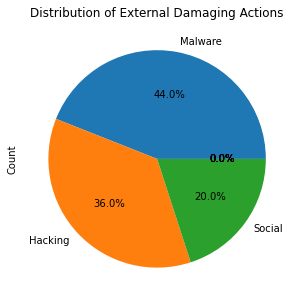

In [57]:
df3 = df[df['actor.External'] == True]
df3 = df3[df3['impact.overall_rating.Damaging'] == True]

summary = v.enum_summary(df3, 'action')

summary = summary.drop('freq', axis=1)
summary = summary.drop('n', axis=1)
summary.columns = ['Action', 'Count']
summary = summary.set_index('Action')
plot = summary.plot.pie(y='Count', figsize=(5, 5), legend=None, autopct='%1.1f%%')
plt.title('Distribution of External Damaging Actions')
summary.head(20)

,Count
Action,
Misuse,5
Error,4
Environmental,0
Hacking,0
Malware,0
Physical,0
Social,0
Unknown,0


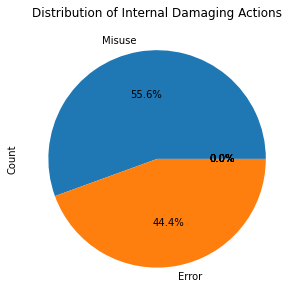

In [58]:
df3 = df[df['actor.Internal'] == True]
df3 = df3[df3['impact.overall_rating.Damaging'] == True]

summary = v.enum_summary(df3, 'action')

summary = summary.drop('freq', axis=1)
summary = summary.drop('n', axis=1)
summary.columns = ['Action', 'Count']
summary = summary.set_index('Action')
plot = summary.plot.pie(y='Count', figsize=(5, 5), legend=None, autopct='%1.1f%%')
plt.title('Distribution of Internal Damaging Actions')
summary.head(20)

#### We are looking at attacks that have an overall impact rating of "Damaging", anything less than this is insignificant and cases worse than this are very rare, meaning there is not enough data to dive deeper.

Looking at these summary tables, it is clear that external attacks are more aggressive and intentful in nature whereas internal damaging cyber incidents, appear to be from negligence and mistake. This is interesting because as internal developers have inside knowledge of the system, it's expected that there would be more succesful and damaging hacking attempts than external.

#### What actions to internal developers do that usually causes damage?

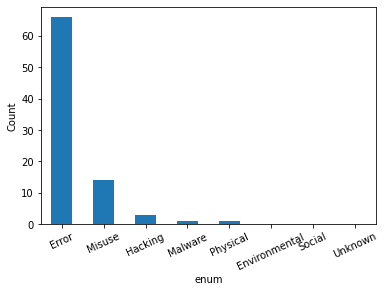

In [59]:
developers = v.enum_summary(df, 'action', by='actor.internal.variety')
developers = developers[developers['by'] == 'actor.internal.variety.Developer']
developers.plot(kind='bar', x='enum', y='x', legend=False)
plt.xticks(rotation=25)
plt.ylabel('Count')
plt.savefig('developers')

In [92]:
# combined = df
# combined['InternalAction'] = combined['action.Environmental'] | combined['action.Hacking']
# combined['InternalAction'].head()

# internal_variety = df['action.Error']
# internal_actor = df.filter(like='actor.internal.variety')
# variety_crosstab = pd.crosstab(internal_actor, internal_variety)

NameError: name 'vcdb' is not defined

As we can see, the main cause of damage from developers is from error. To prevent internal damage, the most effective course of action would be to educate new developers better on the system as well as enabling various permissions on resources so even if a developer accidentally makes a mistake, they won't have permissions to follow through with their mistake. For example, remove "Drop table" permissions in SQL to prevent developers from accidentally deleting tables. Keeping regular backups of data will also act a a fallback incase anything is accidentally deleted.

#### Let's investigate external damaging actions, in particular, malware as this is the most frequent cause of damage.

In [60]:
external = df[df['actor.External'] == True]
external_malware = external[external['action.Malware'] == True]
summary = v.enum_summary(external_malware, 'discovery_method.internal.variety')
summary.head(20)

,enum,x,n,freq
0,Reported by employee,53,86.0,0.61628
1,Antivirus,8,86.0,0.09302
2,Incident response,8,86.0,0.09302
3,It review,5,86.0,0.05814
4,Financial audit,4,86.0,0.04651
5,Infrastructure monitoring,3,86.0,0.03488
6,Fraud detection,2,86.0,0.02326
7,Nids,2,86.0,0.02326
8,Hids,1,86.0,0.01163
9,Break in discovered,0,86.0,0.00000


In [61]:
external_malware=  external_malware[external_malware['discovery_method.internal.variety.Antivirus'] == True]
print(external_malware['timeline.discovery.value'])

# This must be fucked eh? 

1214     NaN
3101     NaN
4046    15.0
5452     NaN
5613     NaN
5906     NaN
8149     NaN
8150     NaN
Name: timeline.discovery.value, dtype: float64


TODO - find how long it takes to discover malware with antivirus and how long it takes to discover malware with employee reporting, it should be quicker detecting with AV, but less detections happens by AV so then can conclude they should update their AV more lol

# What specific types of internal attacks are most damaging?

As we have seen above, error and misuse are the 2 most common types of internal attacks. To understand how companies can best protect against these attacks, we will look at the specific types of error and misuse and which are most common and damaging.

### Misuse

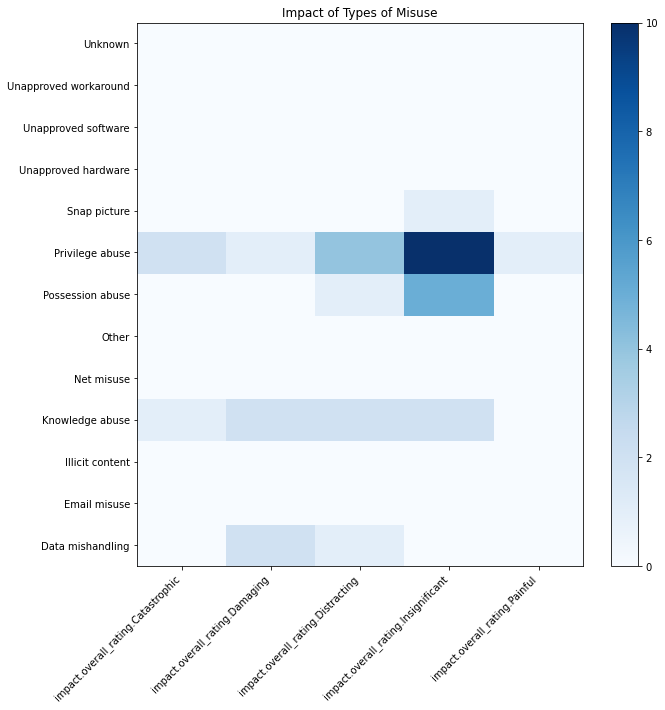

In [219]:
misuse = v.enum_summary(df, 'action.misuse.variety', by='impact.overall_rating')
# misuse.head()
misuse_xtab = pd.pivot_table(misuse, values='x', index=['enum'],
                    columns=['by'], aggfunc=np.sum)
misuse_xtab = misuse_xtab.drop('impact.overall_rating.Unknown', axis=1)

misuse_fig = plt.pcolor(misuse_xtab, cmap=cm.Blues)
plt.yticks(np.arange(0.5,len(misuse_xtab.index), 1), misuse_xtab.index)
plt.xticks(np.arange(0.5,len(misuse_xtab.columns), 1), misuse_xtab.columns, rotation=45, ha="right")
cb = plt.colorbar()
plt.title('Impact of Types of Misuse', color='black')
plt.rcParams["figure.figsize"] = (10,10)
# plt.rcParams["figure.figsize"] = (6,6)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# cb.ax.yaxis.set_tick_params(colors='white')

### Error

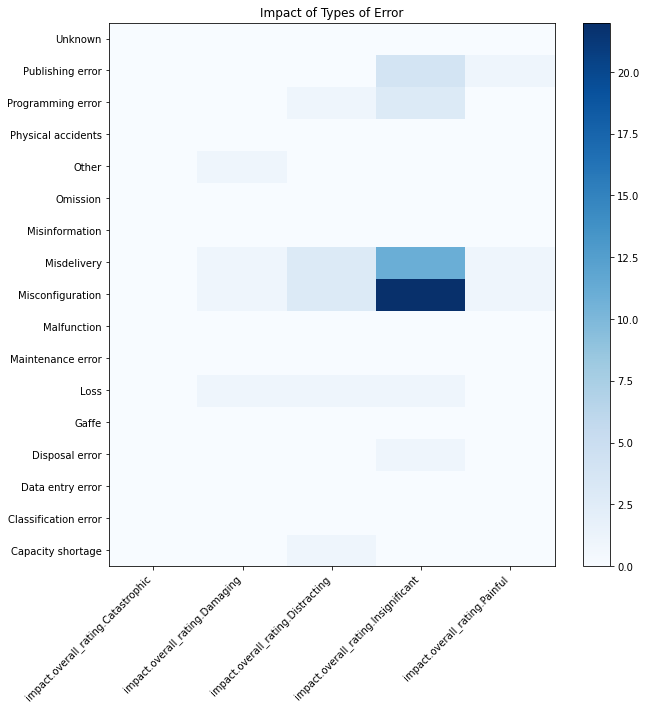

In [218]:
error = v.enum_summary(df, 'action.error.variety', by='impact.overall_rating')
# error.head()
error_xtab = pd.pivot_table(error, values='x', index=['enum'],
                    columns=['by'], aggfunc=np.sum)
error_xtab = error_xtab.drop('impact.overall_rating.Unknown', axis=1)

error_fig = plt.pcolor(error_xtab, cmap=cm.Blues)
plt.yticks(np.arange(0.5,len(error_xtab.index), 1), error_xtab.index)
plt.xticks(np.arange(0.5,len(error_xtab.columns), 1), error_xtab.columns, rotation=45, ha="right")
cb = plt.colorbar()
plt.title('Impact of Types of Error', color='black')
plt.rcParams["figure.figsize"] = (10,10)
# plt.rcParams["figure.figsize"] = (6,6)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# cb.ax.yaxis.set_tick_params(colors='white')

# What specific types of external attacks are most damaging?

### Hacking

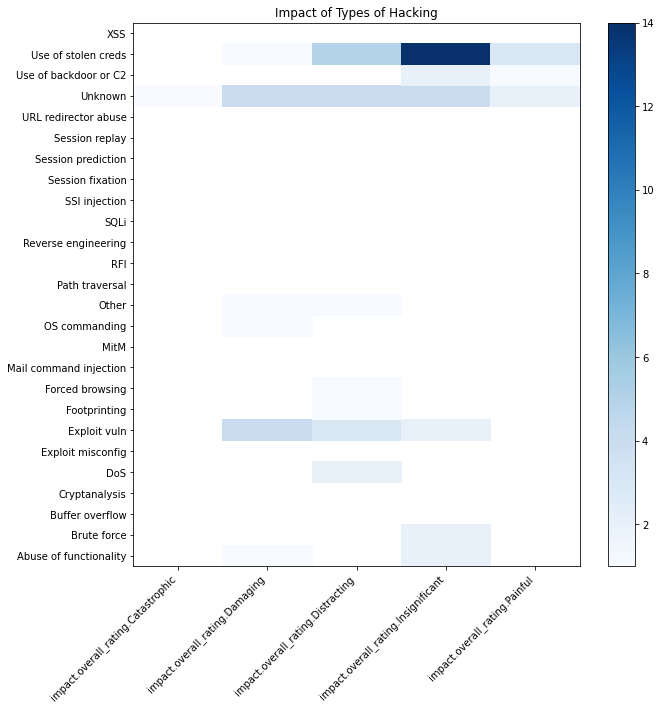

In [226]:
hacking = v.enum_summary(df, 'action.hacking.variety', by='impact.overall_rating')
hacking = hacking[hacking['x'] > 0] #remove enums with no data
# hacking.head(50)
hacking_xtab = pd.pivot_table(hacking, values='x', index=['enum'],
                    columns=['by'], aggfunc=np.sum)
hacking_xtab = hacking_xtab.drop('impact.overall_rating.Unknown', axis=1)

hacking_fig = plt.pcolor(hacking_xtab, cmap=cm.Blues)
plt.yticks(np.arange(0.5,len(hacking_xtab.index), 1), hacking_xtab.index)
plt.xticks(np.arange(0.5,len(hacking_xtab.columns), 1), hacking_xtab.columns, rotation=45, ha="right")
cb = plt.colorbar()
plt.title('Impact of Types of Hacking', color='black')
plt.rcParams["figure.figsize"] = (10,10)
# plt.rcParams["figure.figsize"] = (6,6)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# cb.ax.yaxis.set_tick_params(colors='white')

### Malware

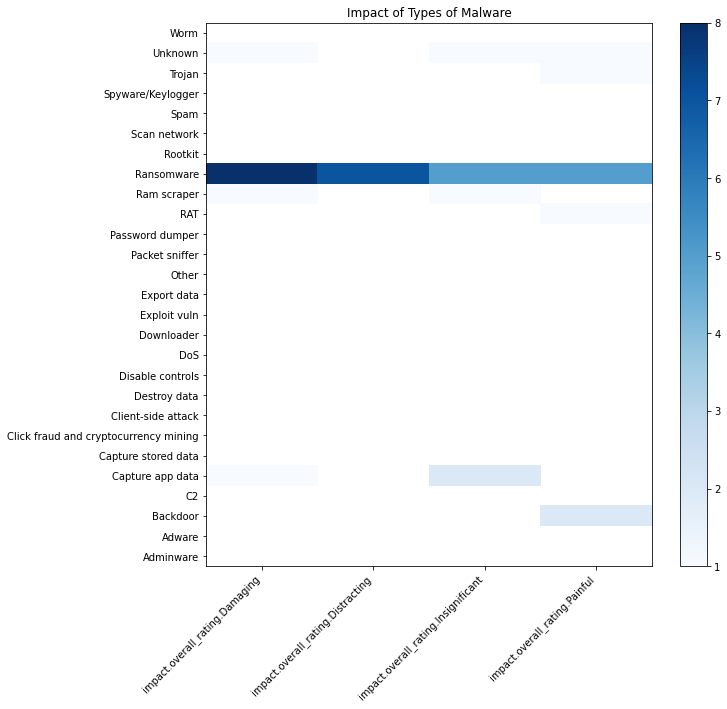

In [227]:
malware = v.enum_summary(df, 'action.malware.variety', by='impact.overall_rating')
malware = malware[malware['x'] > 0] #remove enums with no data
# malware.head(50)
malware_xtab = pd.pivot_table(malware, values='x', index=['enum'],
                    columns=['by'], aggfunc=np.sum)
malware_xtab = malware_xtab.drop('impact.overall_rating.Unknown', axis=1)

malware_fig = plt.pcolor(malware_xtab, cmap=cm.Blues)
plt.yticks(np.arange(0.5,len(malware_xtab.index), 1), malware_xtab.index)
plt.xticks(np.arange(0.5,len(malware_xtab.columns), 1), malware_xtab.columns, rotation=45, ha="right")
cb = plt.colorbar()
plt.title('Impact of Types of Malware', color='black')
plt.rcParams["figure.figsize"] = (10,10)
# plt.rcParams["figure.figsize"] = (6,6)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# cb.ax.yaxis.set_tick_params(colors='white')

### Physical

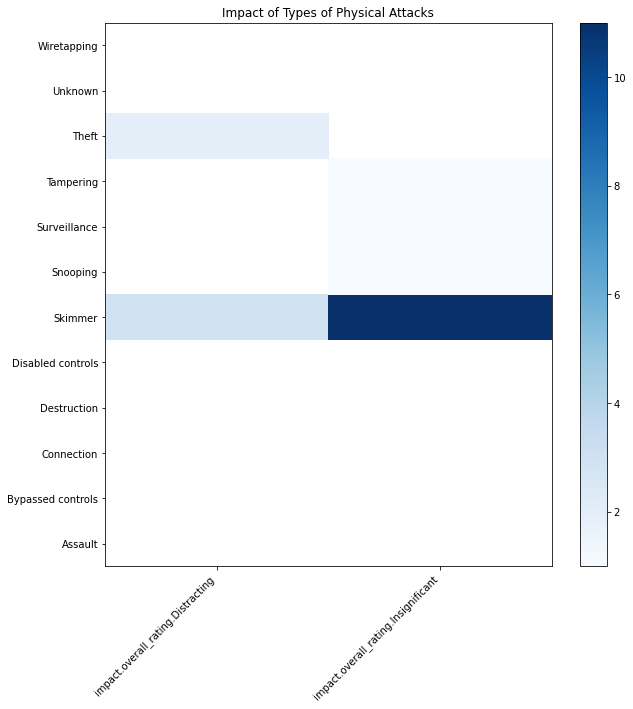

In [228]:
physical = v.enum_summary(df, 'action.physical.variety', by='impact.overall_rating')
physical = physical[physical['x'] > 0] #remove enums with no data
# physical.head(50)
physical_xtab = pd.pivot_table(physical, values='x', index=['enum'],
                    columns=['by'], aggfunc=np.sum)
physical_xtab = physical_xtab.drop('impact.overall_rating.Unknown', axis=1)

physical_fig = plt.pcolor(physical_xtab, cmap=cm.Blues)
plt.yticks(np.arange(0.5,len(physical_xtab.index), 1), physical_xtab.index)
plt.xticks(np.arange(0.5,len(physical_xtab.columns), 1), physical_xtab.columns, rotation=45, ha="right")
cb = plt.colorbar()
plt.title('Impact of Types of Physical Attacks', color='black')
plt.rcParams["figure.figsize"] = (10,10)
# plt.rcParams["figure.figsize"] = (6,6)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# cb.ax.yaxis.set_tick_params(colors='white')

### Social

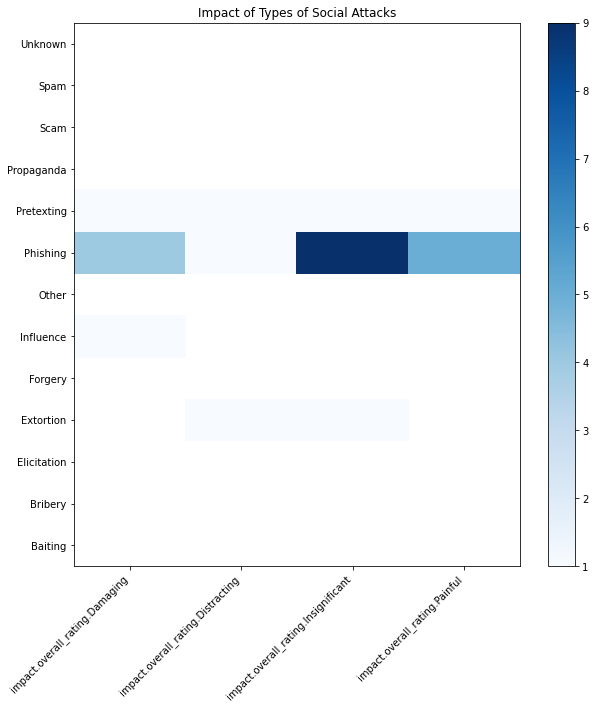

In [229]:
social = v.enum_summary(df, 'action.social.variety', by='impact.overall_rating')
social = social[social['x'] > 0] #remove enums with no data
# social.head(50)
social_xtab = pd.pivot_table(social, values='x', index=['enum'],
                    columns=['by'], aggfunc=np.sum)
social_xtab = social_xtab.drop('impact.overall_rating.Unknown', axis=1)

social_fig = plt.pcolor(social_xtab, cmap=cm.Blues)
plt.yticks(np.arange(0.5,len(social_xtab.index), 1), social_xtab.index)
plt.xticks(np.arange(0.5,len(social_xtab.columns), 1), social_xtab.columns, rotation=45, ha="right")
cb = plt.colorbar()
plt.title('Impact of Types of Social Attacks', color='black')
plt.rcParams["figure.figsize"] = (10,10)
# plt.rcParams["figure.figsize"] = (6,6)
# plt.tick_params(axis='x', colors='white')
# plt.tick_params(axis='y', colors='white')
# cb.ax.yaxis.set_tick_params(colors='white')